In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
import GPy

In [22]:
os.chdir('/home/saumya/Documents/data/snr')

In [23]:
x_dat = np.load('ABS_noisy_SNR.npy').astype(np.half)
# x_dat = np.reshape(x_dat, -1)[:, None]

In [24]:
x_dat.shape

(12500, 3000)

In [25]:
x_dat

array([[ 9.179e-06,  4.983e-05, -8.345e-06, ...,  5.049e-05,  5.502e-05,
         8.035e-05],
       [ 3.916e-05,  5.692e-05,  4.691e-05, ...,  6.241e-05,  8.076e-05,
         8.422e-05],
       [ 4.059e-05,  2.873e-05,  2.116e-05, ...,  7.278e-05,  6.998e-05,
         9.739e-05],
       ...,
       [ 8.279e-05,  4.301e-04, -5.472e-05, ...,  9.289e-04,  1.031e-03,
         2.751e-04],
       [ 3.974e-04, -8.011e-05,  4.261e-04, ...,  6.247e-05,  3.197e-04,
         7.610e-04],
       [ 2.861e-04,  4.668e-04,  1.038e-03, ...,  6.027e-04,  9.632e-04,
         8.621e-04]], dtype=float16)

In [26]:
y_dat_std = np.load('param_SNR.npy')

# y_dat = np.reshape(y_dat, -1)[:, None]

# y_dat = y_dat[:10000]

In [27]:
y_dat_std.shape

(12500, 3)

In [ ]:
y_dat = StandardScaler().fit(y_dat_std)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
def train_val_test_split(X, y, val_size):
    # test_size = 1 - train_size - val_size
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = val_size)
    # relative_train_size = train_size / (val_size + train_size)
    # X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                    #   train_size = relative_train_size, test_size = 1-relative_train_size)
    return X_train_val, X_test, y_train_val, y_test

In [30]:
X_train, X_test, Y_train, Y_test = train_val_test_split(x_dat, y_dat, .2)

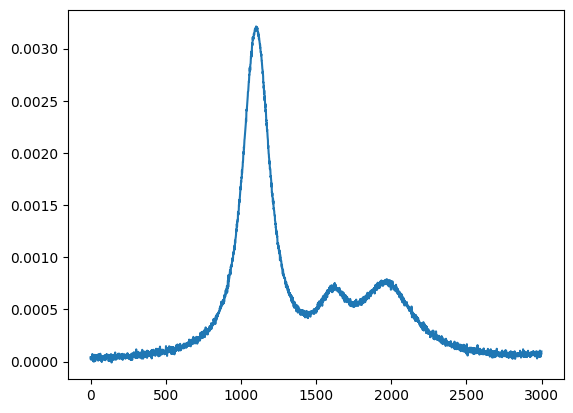

In [31]:
plt.plot(x_dat[2])

In [32]:
# LMC set up
ks = [GPy.kern.RBF(np.shape(X_train)[1]) for i in range(1)]
icm = GPy.util.multioutput.LCM(input_dim=np.shape(X_train)[1],num_outputs=1,kernels_list=ks)

In [33]:
print(icm)
# print('W matrix\n',icm.B.W)
# print('\nkappa vector\n',icm.B.kappa)
# print('\nB matrix\n',icm.B.B)

  ICM0.            |          value  |  constraints  |  priors
  rbf.variance     |            1.0  |      +ve      |        
  rbf.lengthscale  |            1.0  |      +ve      |        
  B.W              |  [-0.26517191]  |               |        
  B.kappa          |            0.5  |      +ve      |        


In [34]:
[Y_train[:,:-1], Y_train[:,-1]]

[array([[6.675e+02, 7.524e-01],
        [7.155e+02, 5.049e-01],
        [5.140e+02, 1.000e+00],
        ...,
        [4.852e+02, 1.000e+00],
        [7.345e+02, 2.576e-01],
        [6.385e+02, 2.576e-01]], dtype=float16),
 array([10.1 , 48.25, 46.03, ..., 31.42, 22.45, 44.9 ], dtype=float16)]

In [35]:
# m = GPy.models.GPCoregionalizedRegression([X_train, X_train, X_train],[np.reshape(Y_train[:, 0], -1)[:, None], np.reshape(Y_train[:, 1], -1)[:, None], np.reshape(Y_train[:, 2], -1)[:, None]],kernel=icm)


In [36]:
m = GPy.models.GPCoregionalizedRegression([X_train],[Y_train],kernel=icm)
m['.*rbf.var'].constrain_fixed(1.)
# constrain if converge to reasonless extrema
# m['mixed_noise.Gaussian_noise_0.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_1.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_2.variance'].constrain_bounded(0,1e-5)
print(m)


Name : gp
Objective : 50738935.064093344
Number of Parameters : 5
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                                    |          value  |  constraints  |  priors
  ICM0.rbf.variance                      |            1.0  |   +ve fixed   |        
  ICM0.rbf.lengthscale                   |            1.0  |      +ve      |        
  ICM0.B.W                               |  [-0.26517191]  |               |        
  ICM0.B.kappa                           |            0.5  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |            1.0  |      +ve      |        


In [37]:
# print('W matrix\n',icm.B.W)
# print('\nkappa vector\n',icm.B.kappa)

In [38]:
m.optimize(messages=True)

In [39]:
print(m)
# print('W matrix\n',icm.B.W)
# print('\nkappa vector\n',icm.B.kappa)
# print('\nB matrix\n',icm.B.B)


Name : gp
Objective : 140200.92512987036
Number of Parameters : 5
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                                    |                value  |  constraints  |  priors
  ICM0.rbf.variance                      |                  1.0  |   +ve fixed   |        
  ICM0.rbf.lengthscale                   |  0.03757068029497772  |      +ve      |        
  ICM0.B.W                               |       [-82.61138609]  |               |        
  ICM0.B.kappa                           |   32.438943447961044  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |    523.7544709557043  |      +ve      |        


In [40]:
newX = X_test

In [41]:
newX = np.concatenate((newX,np.zeros((np.shape(X_test)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys,var=m.predict(newX,Y_metadata=noise_dict)

# Temper_test_=scalerT.inverse_transform(ys)


In [42]:
ys

array([[5.77644679e+02, 5.85128539e-01, 5.30397499e+01],
       [6.62867469e+02, 5.65433122e-01, 3.71756846e+01],
       [7.27440227e+02, 4.51456564e-01, 1.52218884e+01],
       ...,
       [4.76203642e+02, 4.99902533e-01, 5.51503502e+00],
       [7.01127162e+02, 4.95693405e-01, 3.93072693e+01],
       [7.29580964e+02, 6.20044098e-01, 2.81420081e+01]])

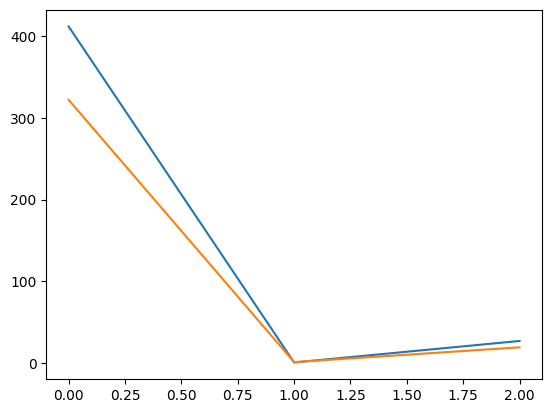

In [43]:
plt.plot(ys[1030])

plt.plot(Y_train[1030])

In [44]:
ys.shape

(2500, 3)

In [45]:
from sklearn import metrics

In [50]:
conc_1 = metrics.mean_absolute_percentage_error(np.array(ys[:, 1]), np.array(Y_test[:, 1]))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 0.5990637104459243


In [51]:
conc_1 = metrics.mean_absolute_percentage_error(np.array(ys[:, 2]), np.array(Y_test[:, 2]))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 0.29036081537290215


In [52]:
conc_1 = metrics.mean_absolute_percentage_error(np.array(ys[:, 0]), np.array(Y_test[:, 0]))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 0.03847363177814547


In [49]:
metrics.mean_absolute_percentage_error(ys, Y_test)

0.30929938586565786